In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_rf = pd.read_csv("random_forest_prediction_3mo.csv")
df_lr = pd.read_csv("linear_prediction_3mo.csv")
df_lstm = pd.read_csv("LSTM_predictions.csv")

In [3]:
df_rf = df_rf.rename(columns={'Predicted_Pct':'RF_Predicted_Pct'})
df_lstm = df_lstm.rename(columns={'y_predict':'LSTM_Predicted_Pct'})
df_lr = df_lr.rename(columns={'Predicted_Pct':'LR_Predicted_Pct'})

In [4]:
df_lr = df_lr.drop(['Recip_County', 'Recip_State', 'Death_Pct'], axis=1)
df_lstm = df_lstm.drop(['Unnamed: 0', 'Death_Pct'], axis=1)

df_lstm.head()

,FIPS,Date,LSTM_Predicted_Pct
0,1001,2022-04-30,0.322111
1,1001,2022-05-31,0.308997
2,1001,2022-06-29,0.288152
3,1003,2022-04-30,0.292741
4,1003,2022-05-31,0.276235


In [5]:
#df_lstm.shape
df_rf.shape

(9236, 6)

In [6]:
df_3mo = pd.merge(df_rf, df_lr, on=['Date', 'FIPS'], how='inner')
df_3mo = pd.merge(df_3mo, df_lstm, on=['Date', 'FIPS'], how='inner')

df_3mo.head()

,Date,FIPS,Recip_County,Recip_State,Death_Pct,RF_Predicted_Pct,LR_Predicted_Pct,LSTM_Predicted_Pct
0,2022-04-30,1001,Autauga County,AL,0.195099,0.187225,0.152263,0.322111
1,2022-04-30,1003,Baldwin County,AL,0.167537,0.161193,0.115595,0.292741
2,2022-04-30,1005,Barbour County,AL,0.170137,0.174560,0.231504,0.291800
3,2022-04-30,1007,Bibb County,AL,0.183085,0.185540,0.224286,0.258476
4,2022-04-30,1009,Blount County,AL,0.186767,0.178715,0.182657,0.288832


In [7]:
df_3mo['RF_diff_Pct'] = (df_3mo['Death_Pct'] - df_3mo['RF_Predicted_Pct'])
df_3mo['LR_diff_Pct'] = (df_3mo['Death_Pct'] - df_3mo['LR_Predicted_Pct'])
df_3mo['LSTM_diff_Pct'] = (df_3mo['Death_Pct'] - df_3mo['LSTM_Predicted_Pct'])

In [8]:
df_1mo = df_3mo[df_3mo['Date'] == '2022-04-30']
print(df_1mo.shape)
df_1mo.head()

(3024, 11)


,Date,FIPS,Recip_County,Recip_State,Death_Pct,RF_Predicted_Pct,LR_Predicted_Pct,LSTM_Predicted_Pct,RF_diff_Pct,LR_diff_Pct,LSTM_diff_Pct
0,2022-04-30,1001,Autauga County,AL,0.195099,0.187225,0.152263,0.322111,0.007874,0.042836,-0.127012
1,2022-04-30,1003,Baldwin County,AL,0.167537,0.161193,0.115595,0.292741,0.006344,0.051942,-0.125204
2,2022-04-30,1005,Barbour County,AL,0.170137,0.174560,0.231504,0.291800,-0.004423,-0.061367,-0.121663
3,2022-04-30,1007,Bibb County,AL,0.183085,0.185540,0.224286,0.258476,-0.002455,-0.041201,-0.075392
4,2022-04-30,1009,Blount County,AL,0.186767,0.178715,0.182657,0.288832,0.008052,0.004110,-0.102065


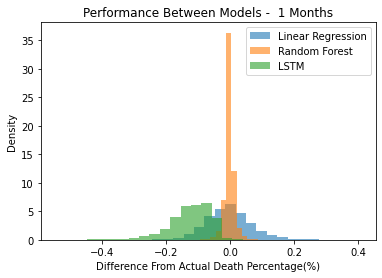

In [9]:
plt.hist(df_1mo['LR_diff_Pct'], bins=20, density=True, alpha=0.6, label='Linear Regression')
plt.hist(df_1mo['RF_diff_Pct'], bins=20, density=True, alpha=0.6, label='Random Forest')
plt.hist(df_1mo['LSTM_diff_Pct'], bins=20, density=True, alpha=0.6, label='LSTM')

plt.xlabel('Difference From Actual Death Percentage(%)')
plt.ylabel('Density')
plt.title('Performance Between Models -  1 Months')
plt.legend(loc='upper right')
plt.show()

In [10]:
df_3mo_cum = df_3mo.groupby('FIPS')['Death_Pct', 'RF_Predicted_Pct', 'LR_Predicted_Pct',
                                    'LSTM_Predicted_Pct'].sum().reset_index()

/var/folders/gf/xh32vxyd5bggbzdctpzlnqk80000gn/T/ipykernel_19585/325621330.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_3mo_cum = df_3mo.groupby('FIPS')['Death_Pct', 'RF_Predicted_Pct', 'LR_Predicted_Pct',


In [11]:
df_3mo_cum.head()

,FIPS,Death_Pct,RF_Predicted_Pct,LR_Predicted_Pct,LSTM_Predicted_Pct
0,1001,0.587088,0.570842,0.456893,0.919261
1,1003,0.505299,0.485169,0.350736,0.825079
2,1005,0.518513,0.530603,0.694349,0.812359
3,1007,0.558185,0.566674,0.678113,0.808213
4,1009,0.565490,0.548135,0.551531,0.876778


In [12]:
df_3mo_cum['RF_diff_Pct'] = (df_3mo_cum['Death_Pct'] - df_3mo_cum['RF_Predicted_Pct'])
df_3mo_cum['LR_diff_Pct'] = (df_3mo_cum['Death_Pct'] - df_3mo_cum['LR_Predicted_Pct'])
df_3mo['LSTM_diff_Pct'] = (df_3mo['Death_Pct'] - df_3mo['LSTM_Predicted_Pct'])

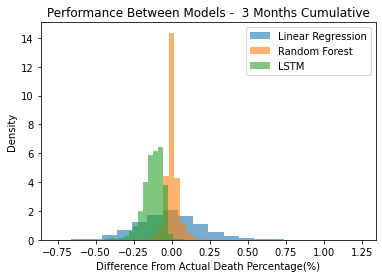

In [13]:
plt.hist(df_3mo_cum['LR_diff_Pct'], bins=20, density=True, alpha=0.6, label='Linear Regression')
plt.hist(df_3mo_cum['RF_diff_Pct'], bins=20, density=True, alpha=0.6, label='Random Forest')
plt.hist(df_1mo['LSTM_diff_Pct'], bins=20, density=True, alpha=0.6, label='LSTM')

plt.xlabel('Difference From Actual Death Percentage(%)')
plt.ylabel('Density')
plt.title('Performance Between Models -  3 Months Cumulative')
plt.legend(loc='upper right')
plt.show()

In [14]:
# Park County, CO, FIPS = 8093
# Death numbers - 15, 16, 17
df_3mo_8093 = df_3mo[df_3mo['FIPS'] == 8093]

# Los Angeles County, CA, FIPS = 6037
# Deaths Numbers (Apr - Jun): 8040, 8214, 8406
df_3mo_6037 = df_3mo[df_3mo['FIPS'] == 6037]

df_3mo_8093.set_index('Date', inplace=True)

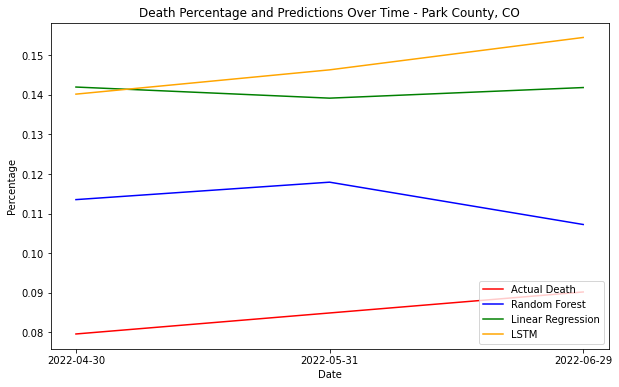

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df_3mo_8093['Death_Pct'], label='Actual Death', color='red')
plt.plot(df_3mo_8093['RF_Predicted_Pct'], label='Random Forest', color='blue')
plt.plot(df_3mo_8093['LR_Predicted_Pct'], label='Linear Regression', color='green')
plt.plot(df_3mo_8093['LSTM_Predicted_Pct'], label='LSTM', color='orange')

plt.title('Death Percentage and Predictions Over Time - Park County, CO')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend(loc='lower right')

In [16]:
df_3mo_6037.set_index('Date', inplace=True)

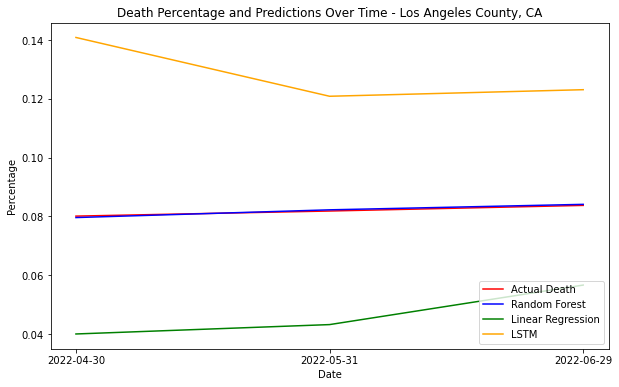

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df_3mo_6037['Death_Pct'], label='Actual Death', color='red')
plt.plot(df_3mo_6037['RF_Predicted_Pct'], label='Random Forest', color='blue')
plt.plot(df_3mo_6037['LR_Predicted_Pct'], label='Linear Regression', color='green')
plt.plot(df_3mo_6037['LSTM_Predicted_Pct'], label='LSTM', color='orange')

plt.title('Death Percentage and Predictions Over Time - Los Angeles County, CA')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend(loc='lower right')